# 서울시 구별 CCTV 현황 분석하기

### 1-1. 엑셀파일 읽기 - cctv 현황

In [108]:
import pandas as pd

In [109]:
# read_csv 함수: csv 파일 읽기 (경로, 인코딩)
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
# 상위 5개 보기
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [110]:
# CCTV_Seoul의 컬럼 보기
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [111]:
# 첫 번째 컬럼 보기
CCTV_Seoul.columns[0]

'기관명'

In [112]:
# rename: 컬럼명 변경하기/ (colums={바꿀컬럼 : 변경할 이름})
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'})
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 1-2. 엑셀파일 읽기 - 서울시 인구 현황

In [113]:
# read_excel: 엑셀 파일 읽기
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [114]:
pop_Seoul = pd.read_excel('01. population_in_Seoul.xls',
                        # 2번째부터 읽어오기 (0 부터임)
                         header=2,
                        # 저 열들만 가져오겠다
                         usecols = 'B, D, G, J, N',
                         encoding='utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [115]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 1-3. pandas 기초

In [116]:
import numpy as np

In [117]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [118]:
# date_range: 날짜형 데이터/ (기본 날짜, periods)
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [119]:
df = pd.DataFrame(np.random.randn(6,4), index=dates,
                 columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
2013-01-01,0.085966,0.689513,-3.006141,-0.317036
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952
2013-01-03,-0.591705,0.064781,-1.227132,0.431958
2013-01-04,-0.134987,0.183943,1.715003,1.026253
2013-01-05,0.259490,1.162106,-1.216347,-0.575132
2013-01-06,1.044954,0.297183,-0.295505,0.942196


In [120]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [121]:
df.values

array([[ 0.08596628,  0.6895128 , -3.00614068, -0.31703642],
       [ 0.91302065, -0.60009586, -0.29280865, -0.57995215],
       [-0.59170476,  0.06478144, -1.2271318 ,  0.43195753],
       [-0.13498737,  0.18394319,  1.71500326,  1.02625313],
       [ 0.25948978,  1.16210581, -1.21634741, -0.5751324 ],
       [ 1.04495445,  0.29718309, -0.29550538,  0.94219576]])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [123]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.262790,0.299572,-0.720488,0.154714
std,0.625179,0.595638,1.550607,0.741826
min,-0.591705,-0.600096,-3.006141,-0.579952
25%,-0.079749,0.094572,-1.224436,-0.510608
50%,0.172728,0.240563,-0.755926,0.057461
75%,0.749638,0.591430,-0.293483,0.814636
max,1.044954,1.162106,1.715003,1.026253


In [124]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-05,0.259490,1.162106,-1.216347,-0.575132
2013-01-01,0.085966,0.689513,-3.006141,-0.317036
2013-01-06,1.044954,0.297183,-0.295505,0.942196
2013-01-04,-0.134987,0.183943,1.715003,1.026253
2013-01-03,-0.591705,0.064781,-1.227132,0.431958
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952


In [125]:
df['A']

2013-01-01    0.085966
2013-01-02    0.913021
2013-01-03   -0.591705
2013-01-04   -0.134987
2013-01-05    0.259490
2013-01-06    1.044954
Freq: D, Name: A, dtype: float64

In [126]:
df[0:3]

,A,B,C,D
2013-01-01,0.085966,0.689513,-3.006141,-0.317036
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952
2013-01-03,-0.591705,0.064781,-1.227132,0.431958


In [127]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952
2013-01-03,-0.591705,0.064781,-1.227132,0.431958
2013-01-04,-0.134987,0.183943,1.715003,1.026253


In [128]:
df.loc[dates[0]]

A    0.085966
B    0.689513
C   -3.006141
D   -0.317036
Name: 2013-01-01 00:00:00, dtype: float64

In [129]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.085966,0.689513
2013-01-02,0.913021,-0.600096
2013-01-03,-0.591705,0.064781
2013-01-04,-0.134987,0.183943
2013-01-05,0.259490,1.162106
2013-01-06,1.044954,0.297183


In [130]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.913021,-0.600096
2013-01-03,-0.591705,0.064781
2013-01-04,-0.134987,0.183943


In [131]:
df.loc['20130102',['A','B']]

A    0.913021
B   -0.600096
Name: 2013-01-02 00:00:00, dtype: float64

In [132]:
df.loc[dates[0], 'A']

0.08596628262953766

In [133]:
df.iloc[3]

A   -0.134987
B    0.183943
C    1.715003
D    1.026253
Name: 2013-01-04 00:00:00, dtype: float64

In [134]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.134987,0.183943
2013-01-05,0.259490,1.162106


In [135]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.913021,-0.292809
2013-01-03,-0.591705,-1.227132
2013-01-05,0.259490,-1.216347


In [136]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952
2013-01-03,-0.591705,0.064781,-1.227132,0.431958


In [137]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.689513,-3.006141
2013-01-02,-0.600096,-0.292809
2013-01-03,0.064781,-1.227132
2013-01-04,0.183943,1.715003
2013-01-05,1.162106,-1.216347
2013-01-06,0.297183,-0.295505


In [138]:
df['A']

2013-01-01    0.085966
2013-01-02    0.913021
2013-01-03   -0.591705
2013-01-04   -0.134987
2013-01-05    0.259490
2013-01-06    1.044954
Freq: D, Name: A, dtype: float64

In [139]:
df.A

2013-01-01    0.085966
2013-01-02    0.913021
2013-01-03   -0.591705
2013-01-04   -0.134987
2013-01-05    0.259490
2013-01-06    1.044954
Freq: D, Name: A, dtype: float64

In [140]:
df[df.A>0]

,A,B,C,D
2013-01-01,0.085966,0.689513,-3.006141,-0.317036
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952
2013-01-05,0.259490,1.162106,-1.216347,-0.575132
2013-01-06,1.044954,0.297183,-0.295505,0.942196


In [141]:
df[df>0]

,A,B,C,D
2013-01-01,0.085966,0.689513,NaN,NaN
2013-01-02,0.913021,NaN,NaN,NaN
2013-01-03,NaN,0.064781,NaN,0.431958
2013-01-04,NaN,0.183943,1.715003,1.026253
2013-01-05,0.259490,1.162106,NaN,NaN
2013-01-06,1.044954,0.297183,NaN,0.942196


In [142]:
df2 = df.copy()

In [143]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.085966,0.689513,-3.006141,-0.317036,one
2013-01-02,0.913021,-0.600096,-0.292809,-0.579952,one
2013-01-03,-0.591705,0.064781,-1.227132,0.431958,two
2013-01-04,-0.134987,0.183943,1.715003,1.026253,three
2013-01-05,0.259490,1.162106,-1.216347,-0.575132,four
2013-01-06,1.044954,0.297183,-0.295505,0.942196,three


In [144]:
df2['E'].isin(['two', 'four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [145]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.591705,0.064781,-1.227132,0.431958,two
2013-01-05,0.259490,1.162106,-1.216347,-0.575132,four


In [146]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.085966,0.689513,-3.006141,-0.317036
2013-01-02,0.998987,0.089417,-3.298949,-0.896989
2013-01-03,0.407282,0.154198,-4.526081,-0.465031
2013-01-04,0.272295,0.338142,-2.811078,0.561222
2013-01-05,0.531785,1.500247,-4.027425,-0.013910
2013-01-06,1.576739,1.797430,-4.322931,0.928285


### 1-4. CCTV 데이터 파악하기

In [147]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [148]:
CCTV_Seoul.sort_values(by='소계').head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [149]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] +
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


### 1-5. 서울시 인구 데이터 파악하기

In [150]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [151]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [152]:
pop_Seoul['구별'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [153]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [154]:
pop_Seoul.iloc[-1]

구별     NaN
인구수    NaN
한국인    NaN
외국인    NaN
고령자    NaN
Name: 26, dtype: object

In [155]:
pop_Seoul.drop([26], inplace=True)

In [156]:
pop_Seoul.iloc[-1]

구별        강동구
인구수    453233
한국인    449019
외국인      4214
고령자     54622
Name: 25, dtype: object

In [157]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689


In [158]:
pop_Seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883


In [159]:
pop_Seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,합계,10197604.0,9926968.0,270636.0,1321458.0,2.653918,12.958515
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


### 1-6. pandas 두 dataframe 병합하기

In [160]:
import numpy as np
import pandas as pd

In [161]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [162]:
result = pd.concat([df1, df2, df3])

In [163]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [164]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [165]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [166]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [167]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [168]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [169]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

# axis=0: 위 아래로 병합
# axis=1: 왼쪽 오른쪽으로 병합
result = pd.concat([df1, df4], axis=1)

In [170]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [171]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [172]:
# join='inner' : 공통된 인덱스만 합치기
# concat은 행인덱스 기준으로 병합한다
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [173]:
result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [174]:
result = pd.concat([df1, df4], ignore_index=True)
result

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [175]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [176]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [177]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [178]:
# 공통된 key값만 합치기!
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [179]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [180]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [181]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


### 1-7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [189]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [190]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [191]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [192]:
import matplotlib.pylab as plt

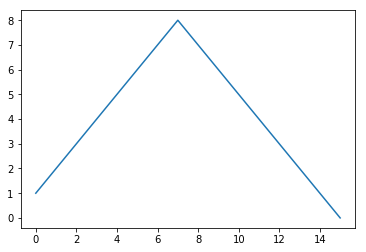

In [195]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,7,6,5,4,3,2,1,0])
plt.show()

In [196]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

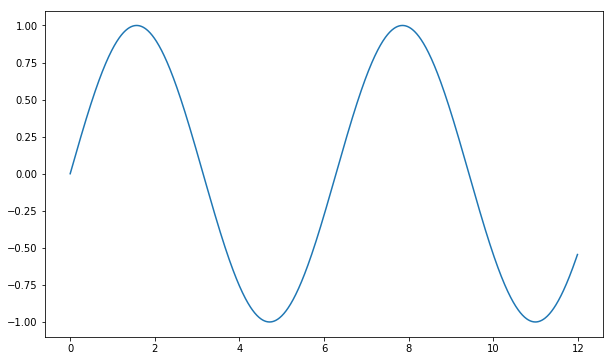

In [197]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.show()

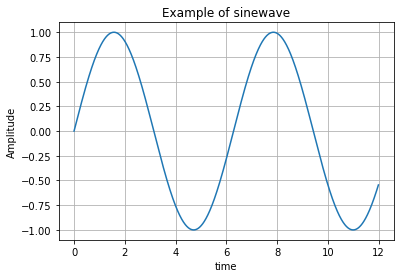

In [203]:
plt.figure()
plt.plot(t,y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

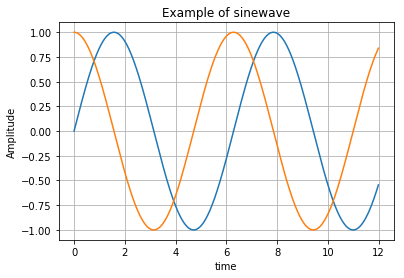

In [205]:
plt.figure()
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

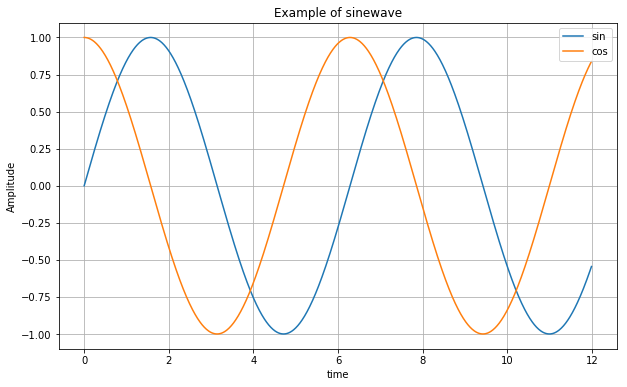

In [207]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
# 범례
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

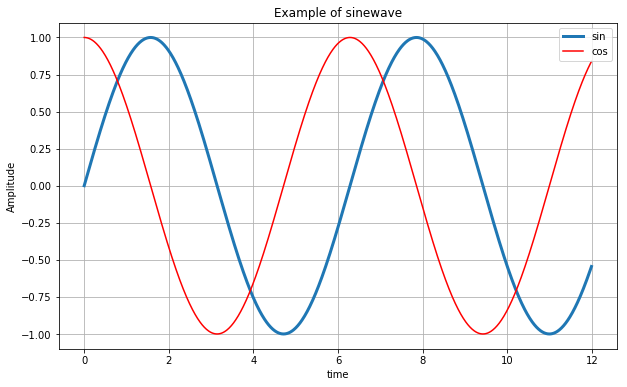

In [208]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

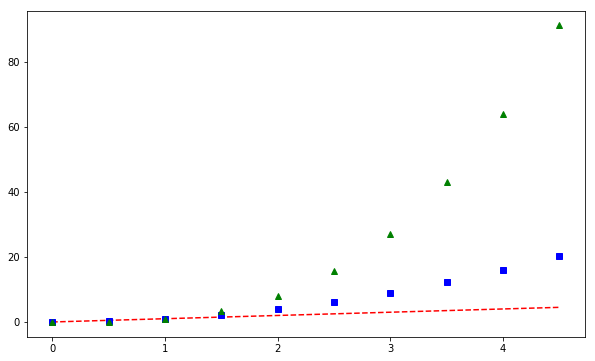

In [209]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

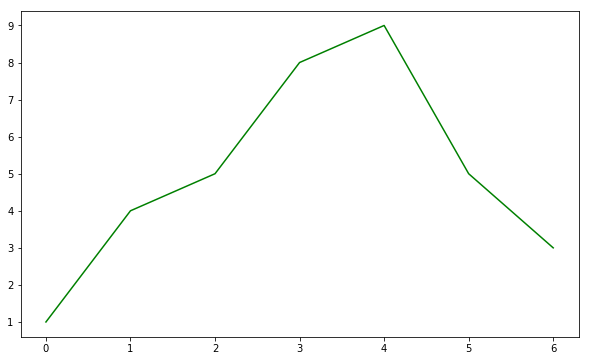

In [211]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, 'g')
plt.show()

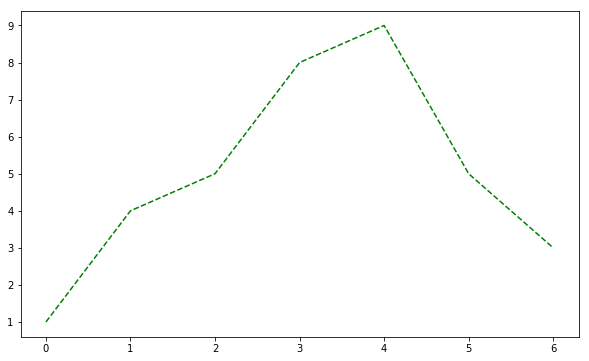

In [212]:
plt.figure(figsize=(10,6))
plt.plot(t, y, 'g--')
plt.show()

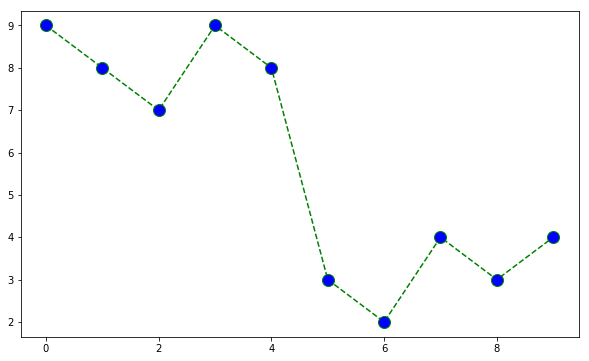

In [222]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor='b', markersize=12)
plt.show()

In [220]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

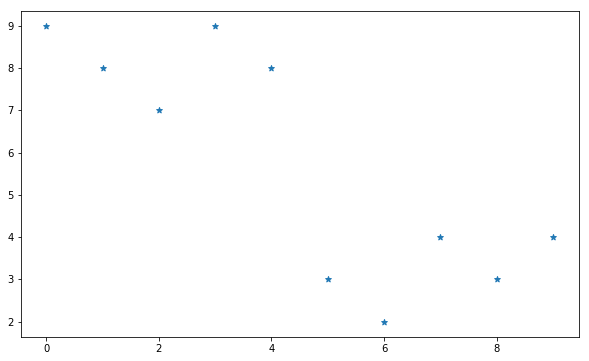

In [236]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='*')
plt.show()

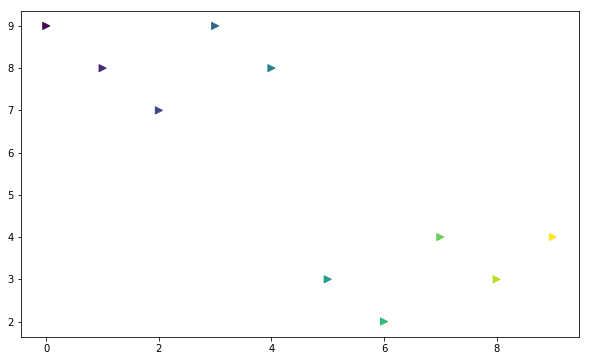

In [239]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s=50, c = colormap, marker='>')
plt.show()

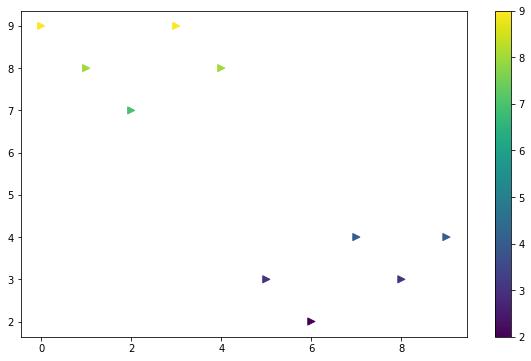

In [241]:
colormap = y

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [242]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

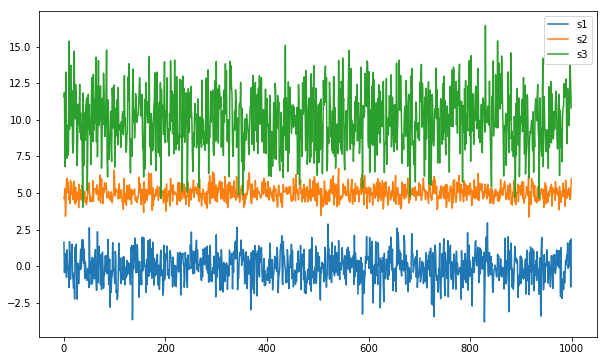

In [243]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

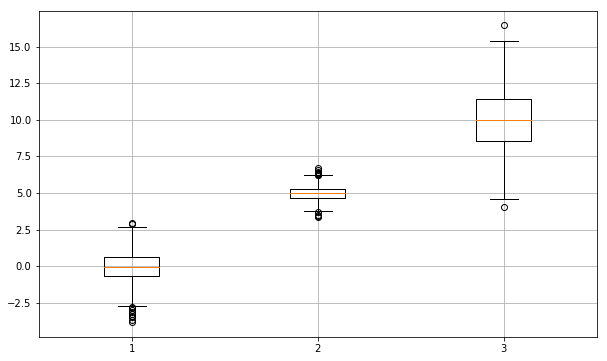

In [244]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

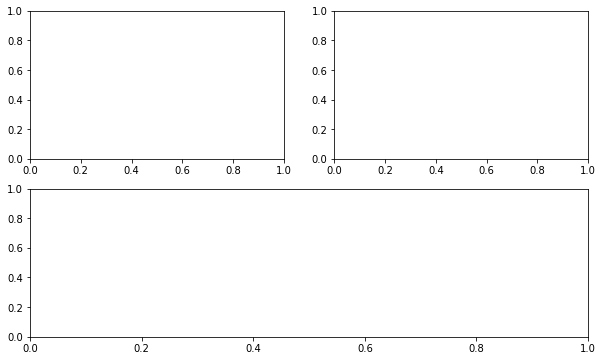

In [251]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

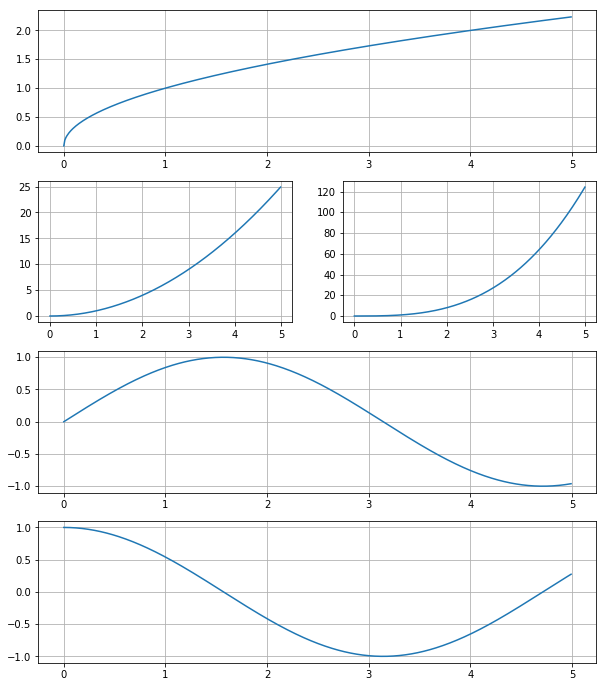

In [252]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

In [255]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

In [256]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


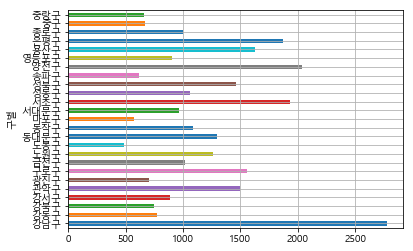

In [259]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True)
plt.show()

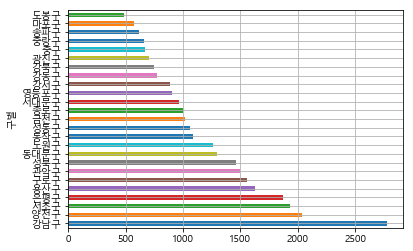

In [261]:
data_result['소계'].sort_values(ascending=False).plot(kind='barh',
                                    grid=True)
plt.show()

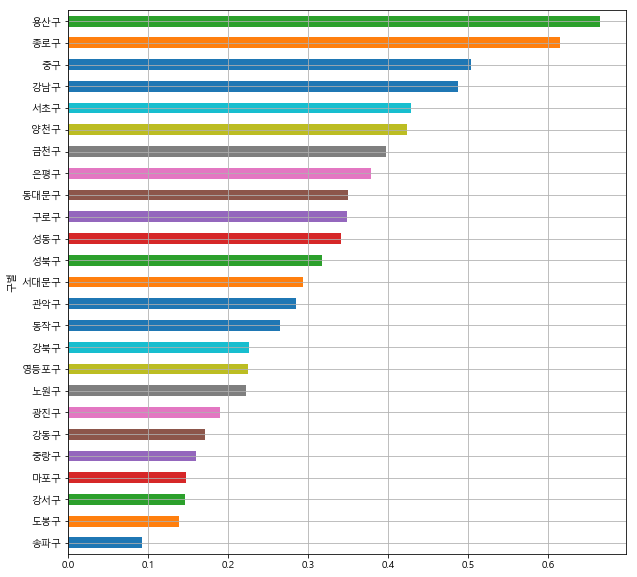

In [262]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()


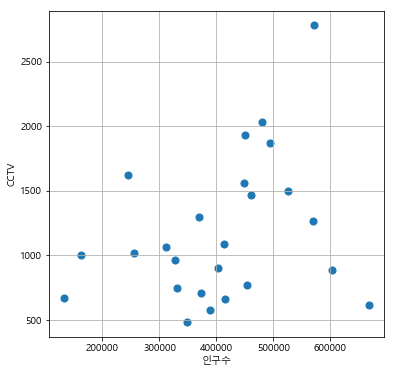

In [265]:

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [271]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [272]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

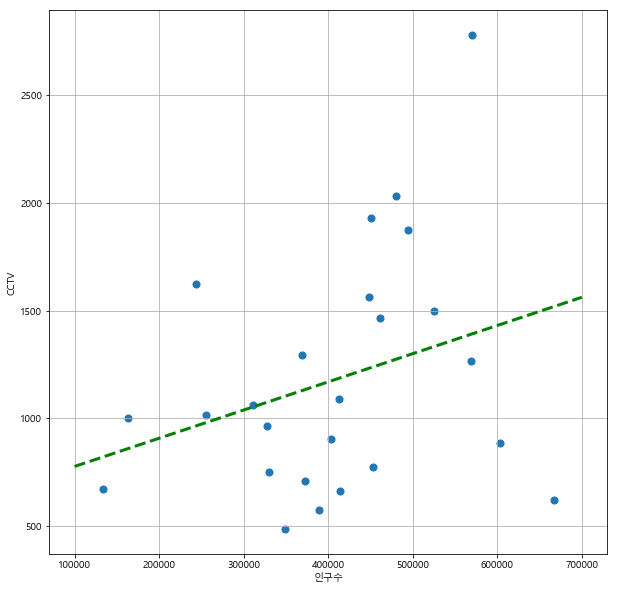

In [273]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [274]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


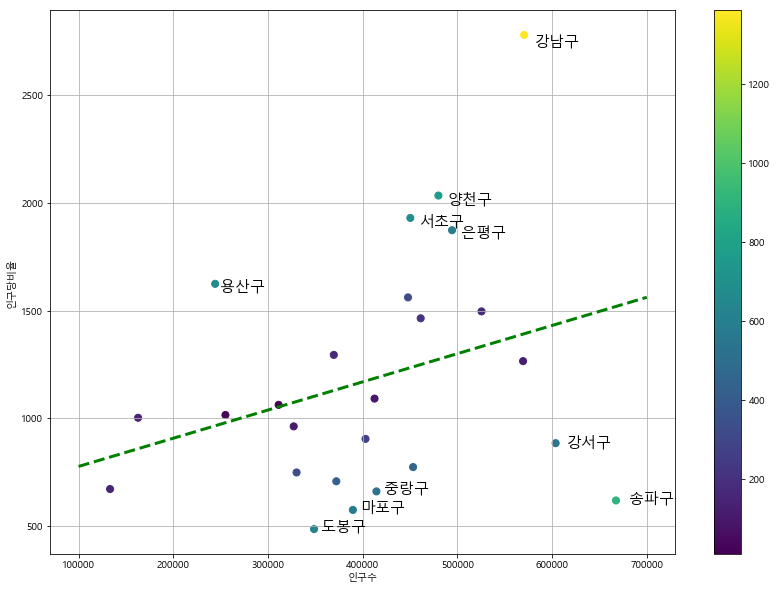

In [277]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()